In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder,LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split


from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression, BayesianRidge
from sklearn.compose import make_column_transformer
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector

from sklearn.impute import SimpleImputer, KNNImputer
import category_encoders as ce
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.linear_model import  Lars, OrthogonalMatchingPursuit, SGDRegressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import QuantileTransformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PowerTransformer

from category_encoders import TargetEncoder
from sklearn.metrics import fbeta_score, make_scorer
from sklearn import svm
from matplotlib.colors import ListedColormap
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from IPython.display import Image

from sklearn.tree import export_graphviz
import dtreeviz
from sklearn.metrics import f1_score, make_scorer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, log_loss, zero_one_loss
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score, ShuffleSplit
from sklearn.ensemble import VotingClassifier
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection  import RFE
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.svm import SVR
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectFpr
from sklearn.feature_selection import SelectFdr
from sklearn.feature_selection import SelectFwe
from sklearn.feature_selection import f_regression
from sklearn.ensemble import RandomForestRegressor

In [2]:
path_train = pd.read_csv('train_house_B.csv')
path_train

,price,0,1,2,3,4,5,6,7,8,...,19,20,21,22,23,24,25,26,27,28
0,2604000,1.222962,0.047686,-1.033389,-2.465344,0.831065,0.802990,1.590989,0.727946,0.893957,...,-0.141322,-0.554035,-1.308863,-0.570187,-0.882735,-0.805741,-0.929397,0.232557,-0.679063,1.307431
1,4900000,-0.091662,-0.356325,-0.486840,-2.465344,-0.126718,-0.024866,-0.323972,1.658337,1.751428,...,-0.141322,-0.554035,0.047278,-0.570187,-0.897850,-0.805741,0.224410,0.864016,1.472618,-0.478408
2,4480000,1.222962,-1.064819,0.338749,0.405623,-0.854973,-0.654330,0.525426,0.585866,-1.661101,...,-0.141322,-0.554035,-1.308863,-0.570187,-0.491114,0.355976,-0.929397,1.118967,1.472618,1.307431
3,3234000,1.222962,-1.570692,-0.696696,0.405623,-0.670784,-0.024866,0.557116,-1.280083,1.273040,...,-0.141322,-0.554035,1.403419,-0.570187,-0.724485,-0.805741,0.224410,0.924687,-0.679063,-0.478408
4,3780000,-1.406286,-1.563680,-1.058295,0.405623,-0.126718,-0.879174,-1.649281,0.496669,0.255596,...,-0.141322,1.804941,0.047278,-0.570187,-0.306965,-0.805741,1.378217,0.170486,-0.679063,-0.478408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,3360000,-0.091662,0.593876,-0.087882,-2.465344,0.077307,0.151482,1.452151,1.772175,-1.264971,...,-0.141322,-0.554035,1.403419,-0.570187,0.454355,-0.805741,1.378217,1.200306,-0.679063,1.307431
404,5950000,-1.406286,0.179794,0.640850,0.405623,-0.126718,-0.975186,-1.028510,0.203867,-1.190658,...,-0.141322,1.804941,0.047278,-0.570187,-1.037904,1.517692,-0.929397,0.960546,-0.679063,-0.478408
405,3675000,-0.091662,1.099966,0.225750,-2.465344,-0.716123,-0.534316,-0.090348,1.151380,1.631097,...,-0.141322,-0.554035,-1.308863,-0.570187,0.477182,-0.805741,-0.929397,-1.512245,-0.679063,1.307431
406,7455000,1.222962,1.498909,-0.392289,0.405623,-0.126718,-0.024866,1.484438,-1.233671,-0.469048,...,-0.141322,-0.554035,0.047278,1.421812,0.407275,0.355976,0.224410,-1.477806,-0.679063,-0.478408


In [3]:
path_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408 entries, 0 to 407
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   408 non-null    int64  
 1   0       408 non-null    float64
 2   1       408 non-null    float64
 3   2       408 non-null    float64
 4   3       408 non-null    float64
 5   4       408 non-null    float64
 6   5       408 non-null    float64
 7   6       408 non-null    float64
 8   7       408 non-null    float64
 9   8       408 non-null    float64
 10  9       408 non-null    float64
 11  10      408 non-null    float64
 12  11      408 non-null    float64
 13  12      408 non-null    float64
 14  13      408 non-null    float64
 15  14      408 non-null    float64
 16  15      408 non-null    float64
 17  16      408 non-null    float64
 18  17      408 non-null    float64
 19  18      408 non-null    float64
 20  19      408 non-null    float64
 21  20      408 non-null    float64
 22  21

In [4]:
cor = path_train.corr()
cor.style.background_gradient(cmap='coolwarm')

/Users/evgeniakonzafarova/anaconda3/lib/python3.11/site-packages/pandas/io/formats/style.py:3618: RuntimeWarning: All-NaN slice encountered
/Users/evgeniakonzafarova/anaconda3/lib/python3.11/site-packages/pandas/io/formats/style.py:3619: RuntimeWarning: All-NaN slice encountered


,price,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28
price,1.000000,-0.286478,0.077768,0.563425,0.277344,0.230032,0.123489,0.023240,-0.058357,0.044062,-0.026874,nan,-0.043878,0.511799,0.024195,0.023643,0.171000,0.227890,0.075106,0.335347,0.329963,0.364022,0.359166,0.530927,-0.028897,0.386473,0.415463,-0.031564,0.418608,-0.112216
0,-0.286478,1.000000,-0.105334,-0.180131,-0.145444,0.000736,0.056038,0.040782,0.102345,-0.104896,0.056612,nan,-0.055793,-0.071993,0.095986,-0.033083,-0.045459,-0.120691,-0.025142,-0.072863,-0.116691,-0.114774,-0.080717,-0.119670,0.023332,-0.162582,-0.090853,-0.017687,-0.140267,0.050581
1,0.077768,-0.105334,1.000000,0.128683,0.079707,0.057467,0.004717,0.014808,-0.044145,-0.014551,0.049353,nan,-0.044184,0.048726,0.064644,-0.032673,-0.039317,0.035256,0.003013,0.037788,-0.016815,0.049828,0.028619,0.050157,0.038509,0.104312,-0.005453,-0.024528,0.113910,0.058156
2,0.563425,-0.180131,0.128683,1.000000,0.254300,0.260241,-0.235658,0.049358,-0.023237,-0.014880,0.037207,nan,-0.065532,0.517711,0.006567,0.045968,0.026574,0.140172,-0.022291,0.234583,0.150639,0.243506,0.185434,0.226779,0.018653,0.361520,0.115848,-0.092757,0.212184,-0.029247
3,0.277344,-0.145444,0.079707,0.254300,1.000000,0.043530,-0.057441,-0.015792,-0.096265,-0.102720,0.050073,nan,-0.000822,0.131529,0.054573,-0.012198,0.018281,0.082354,-0.014943,0.035752,0.069576,0.187973,-0.023067,0.047384,0.006961,0.203631,0.108000,0.000878,0.114057,-0.020152
4,0.230032,0.000736,0.057467,0.260241,0.043530,1.000000,0.218964,-0.009105,0.031123,0.075324,-0.051585,nan,0.080315,0.665892,-0.015724,0.053984,0.010201,0.044283,0.036668,0.497388,0.098760,0.012178,0.209174,0.258041,-0.092892,0.089321,0.091034,-0.042565,-0.012519,0.132515
5,0.123489,0.056038,0.004717,-0.235658,-0.057441,0.218964,1.000000,-0.034779,0.003780,0.098682,-0.086837,nan,0.046662,0.180740,-0.036639,0.011222,-0.139305,-0.065097,-0.039431,0.120914,0.514410,-0.018356,0.068937,0.209636,-0.029645,-0.029123,0.524844,0.088176,0.099242,0.238718
6,0.023240,0.040782,0.014808,0.049358,-0.015792,-0.009105,-0.034779,1.000000,-0.093288,0.024148,-0.001988,nan,-0.040231,-0.010297,0.122147,-0.048993,0.072094,-0.046401,0.075128,0.021329,-0.023982,0.012542,0.033102,-0.013854,-0.111028,-0.071758,-0.043540,0.008215,-0.124574,0.000142
7,-0.058357,0.102345,-0.044145,-0.023237,-0.096265,0.031123,0.003780,-0.093288,1.000000,0.012919,0.067720,nan,-0.038496,0.008636,-0.034767,0.067416,-0.043011,-0.009618,0.032762,0.049605,0.036307,-0.023944,-0.020476,0.042600,-0.013152,-0.022755,-0.009101,0.103418,-0.006429,0.027712
8,0.044062,-0.104896,-0.014551,-0.014880,-0.102720,0.075324,0.098682,0.024148,0.012919,1.000000,-0.083665,nan,-0.022240,0.143710,-0.097227,-0.002001,-0.016133,0.090327,0.093592,0.057105,0.094490,-0.075168,0.048972,0.064534,-0.054630,-0.038000,0.040477,0.028765,0.008505,0.036072


In [6]:
path_train['10'].value_counts()

10
0.0    408
Name: count, dtype: int64

In [7]:
path_train.isna().sum()

price    0
0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
dtype: int64

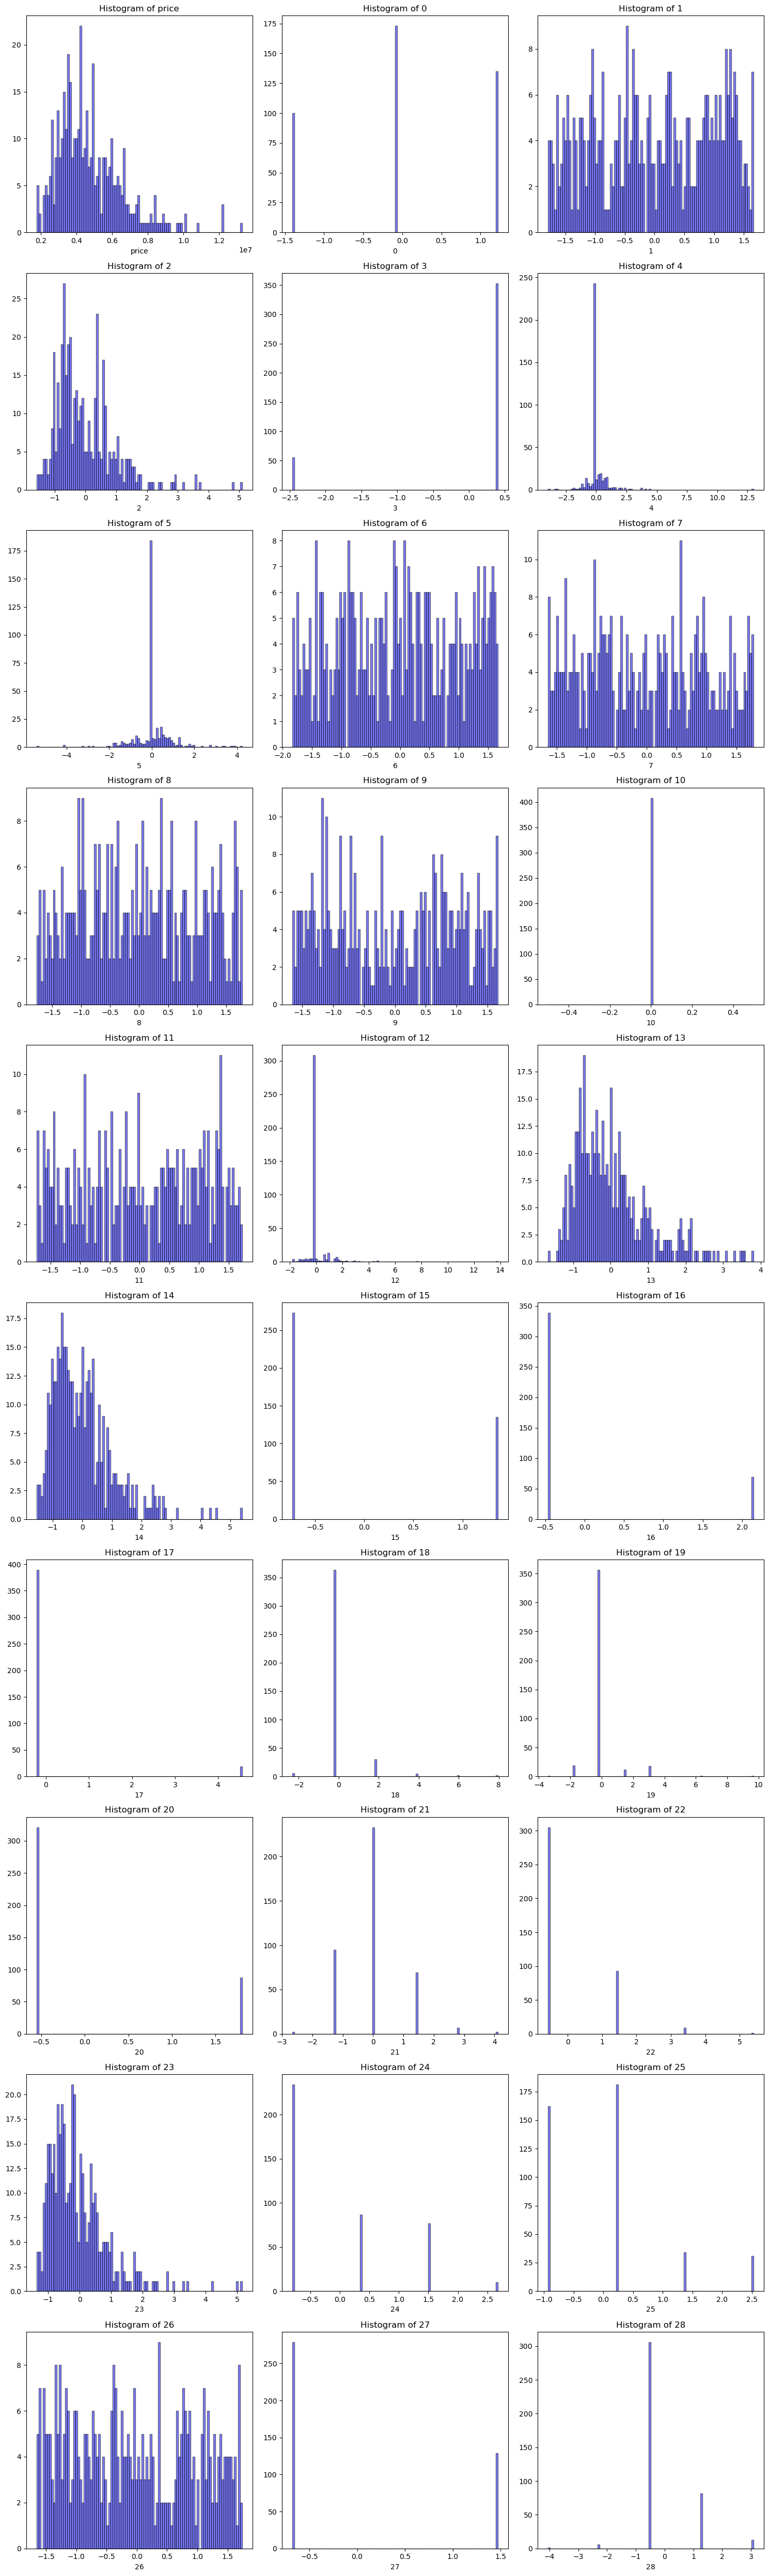

In [8]:
dff = path_train 
num_cols = dff.select_dtypes(include='number').columns
n_rows = int(-(-len(num_cols) // 3)) 
n_cols = 3
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
for i, col in enumerate(num_cols):
    ax = axes[i // n_cols, i % n_cols] 
    ax.hist(dff[col], bins = 100, alpha=0.5, color='b', edgecolor='black')
    ax.set_title(f'Histogram of {col}')
    ax.set_xlabel(col)
for j in range(i+1, n_rows*n_cols):
    fig.delaxes(axes[j // n_cols, j % n_cols])
plt.tight_layout()
plt.show()

In [94]:
X = path_train.drop(columns = ['price'], axis=1)
y = path_train['price']
X_train, X_test, y_train, y_test = train_test_split(X, y)

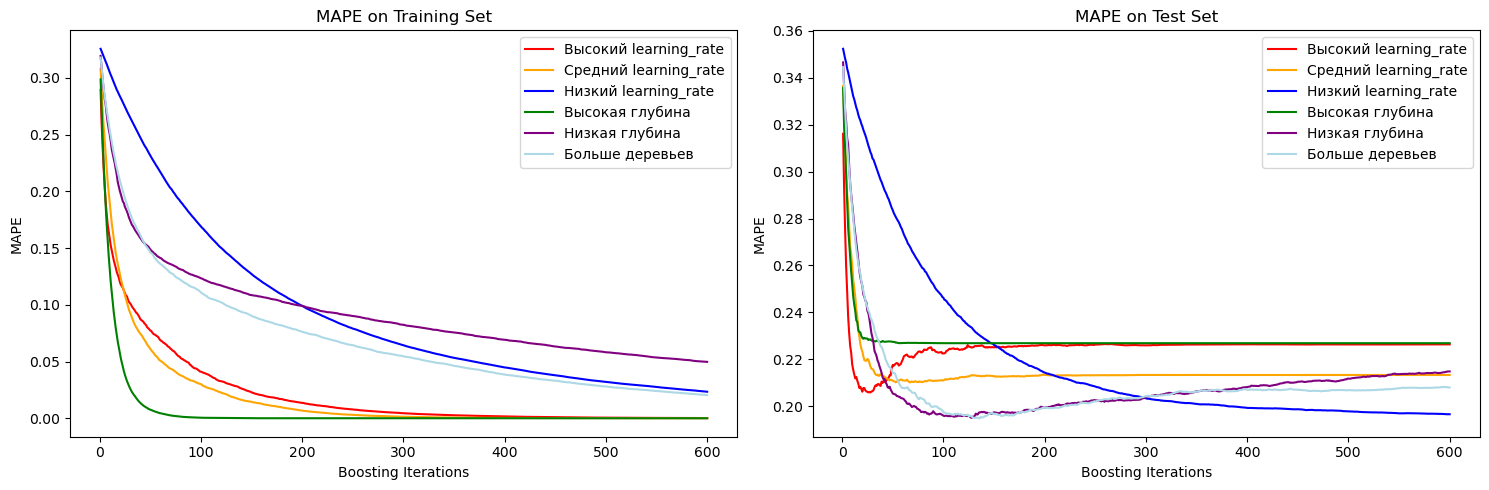

In [10]:
original_params = {
    "n_estimators": 600,
    "random_state": 42,
    'criterion': 'friedman_mse'
}

# Изменение настроек параметров для регрессии
parameter_settings = {
    "high_learning_rate": {
        "label": "Высокий learning_rate",
        "color": "red",
        "params": {"learning_rate": 0.2, "subsample": 1.0, "max_depth": 3,  "max_features": None}
    },
    "moderate_learning_rate": {
        "label": "Средний learning_rate",
        "color": "orange",
        "params": {"learning_rate": 0.1, "subsample": 1.0, "max_depth": 5, "max_features": 'sqrt'}
    },
    "low_learning_rate": {
        "label": "Низкий learning_rate",
        "color": "blue",
        "params": {"learning_rate": 0.01, "subsample": 0.8, "max_depth": 7, "max_features": 'log2'}
    },
    "high_depth": {
        "label": "Высокая глубина",
        "color": "green",
        "params": {"learning_rate": 0.1, "subsample": 0.8, "max_depth": 10, "max_features": None}
    },
    "low_depth": {
        "label": "Низкая глубина",
        "color": "purple",
        "params": {"learning_rate": 0.1, "subsample": 1.0, "max_depth": 2, "max_features": 'sqrt'}
    },
    "more_estimators": {
        "label": "Больше деревьев",
        "color": "lightblue",
        "params": {"learning_rate": 0.05, "subsample": 0.8, "max_depth": 3, "max_features": None}
    }
}


fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

for setting_name, setting_info in parameter_settings.items():
    params = dict(original_params)
    params.update(setting_info['params'])

    reg = GradientBoostingRegressor(**params)
    reg.fit(X_train, y_train)
    
    # Расчет MAPE на обучающем наборе
    train_mape = np.zeros((params["n_estimators"],), dtype=np.float64)
    for i, y_pred in enumerate(reg.staged_predict(X_train)):
        train_mape[i] = mean_absolute_percentage_error(y_train, y_pred)
        
    ax1.plot(
        (np.arange(train_mape.shape[0]) + 1),
        train_mape,
        "-",
        color=setting_info['color'],
        label=setting_info['label'],
    )

    # Расчет MAPE на тестовом наборе
    test_mape = np.zeros((params["n_estimators"],), dtype=np.float64)
    for i, y_pred in enumerate(reg.staged_predict(X_test)):
        test_mape[i] = mean_absolute_percentage_error(y_test, y_pred)
        
    ax2.plot(
        (np.arange(test_mape.shape[0]) + 1),
        test_mape,
        "-",
        color=setting_info['color'],
        label=setting_info['label'],
    )

ax1.set_title("MAPE on Training Set")
ax1.set_xlabel("Boosting Iterations")
ax1.set_ylabel("MAPE")
ax1.legend(loc='upper right')

ax2.set_title("MAPE on Test Set")
ax2.set_xlabel("Boosting Iterations")
ax2.set_ylabel("MAPE")
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()


In [71]:
reg = GradientBoostingRegressor(n_estimators=100, learning_rate= 0.1, subsample=1.0, max_depth=2, max_features='sqrt')
reg.fit(X_train, y_train)


GradientBoostingRegressor(max_depth=2, max_features='sqrt')

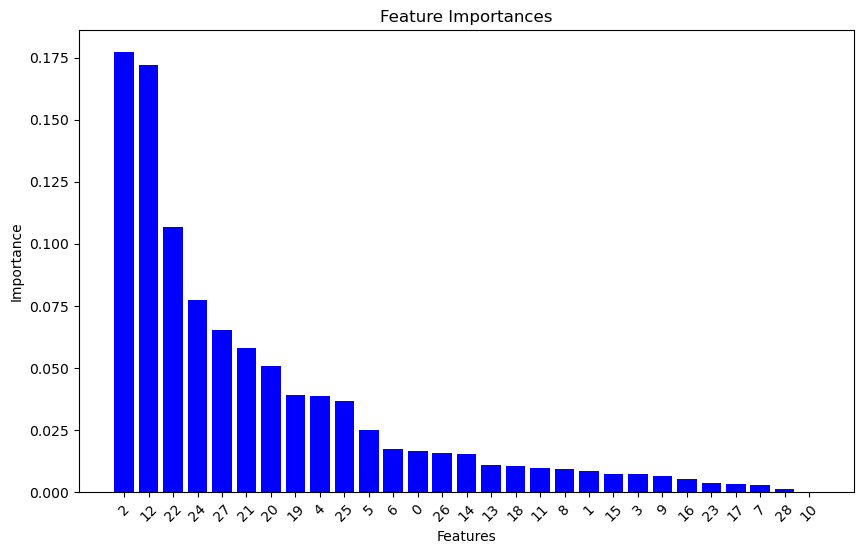

In [72]:
# Получение важности признаков
feature_importances = reg.feature_importances_

# Создание DataFrame для удобства визуализации
features_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Сортировка признаков по важности
features_df = features_df.sort_values(by='Importance', ascending=False)

# Визуализация важности признаков
plt.figure(figsize=(10, 6))
plt.bar(features_df['Feature'], features_df['Importance'], color='blue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=45)
plt.show()

In [73]:
sorted_indices = np.argsort(feature_importances)[::-1]
print("Признаки отсортированы по важности (индексы):", sorted_indices)

Признаки отсортированы по важности (индексы): [ 2 12 22 24 27 21 20 19  4 25  5  6  0 26 14 13 18 11  8  1 15  3  9 16
 23 17  7 28 10]


Оптимально : 22


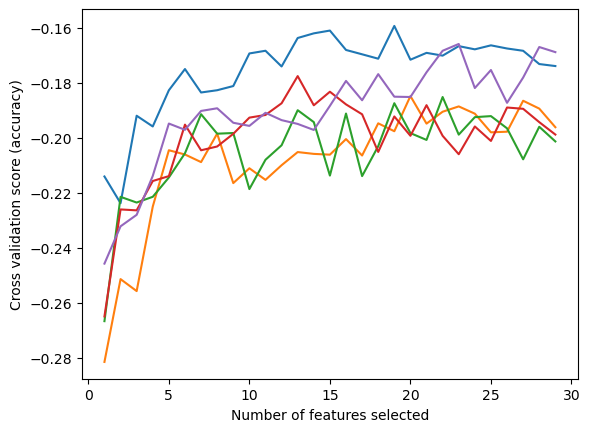

In [95]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.svm import SVR
from sklearn.datasets import make_classification# Build a classification task using 5 informative features
#forest = RandomForestRegressor(n_estimators=100, n_jobs=-1)
#svc = SVR(kernel="linear")
# The "accuracy" scoring shows the proportion of correct classifications

min_features_to_select = 1  # Minimum number of features to consider
rfecv = RFECV(
    estimator=reg,
    step=1,
    cv=KFold(5),
    scoring="neg_mean_absolute_percentage_error",
    min_features_to_select=min_features_to_select,
)
rfecv.fit(X_train, y_train)

print("Оптимально : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
filtered = pd.DataFrame(rfecv.cv_results_).filter(regex='split') #[s for s in rfecv.cv_results_.keys() if 'split' in s]
plt.plot(
    range(min_features_to_select, len(filtered) + min_features_to_select),
    filtered
)
plt.show()

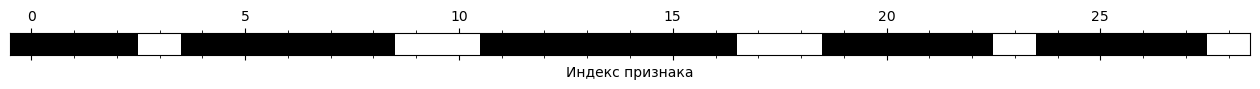

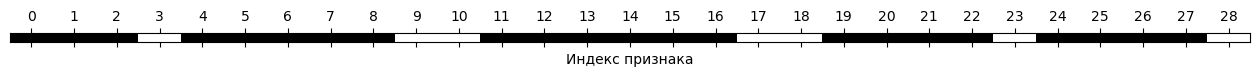

In [96]:
rfe_select = RFE(reg,
             n_features_to_select=22)

rfe_select.fit(X_train, y_train)


# визуализируем отобранные признаки:
mask = rfe_select.get_support()
plt.matshow( mask.reshape(1,-1), cmap = 'gray_r', aspect=0.5)
plt.yticks([])
plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(1))
plt.xlabel("Индекс признака");

mask = rfe_select.get_support()[:30]
plt.matshow( mask.reshape(1,-1), cmap = 'gray_r', aspect=0.2)
plt.yticks([])
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))
plt.xlabel("Индекс признака");

In [97]:
X = path_train[['0','1','2','4', '5','6','7','8','11','12', '13','14','15','16','19','20','21','22', '24', '25', '26', '27']]
y = path_train['price']
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [98]:
reg = GradientBoostingRegressor(n_estimators=100, learning_rate= 0.1, subsample=1.0, max_depth=2, max_features='sqrt')
reg.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=2, max_features='sqrt')

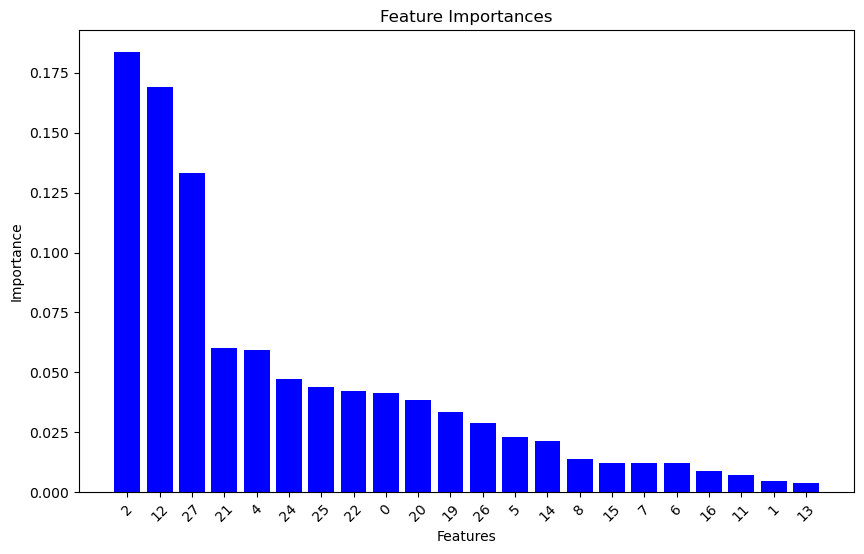

In [104]:
# Получение важности признаков
feature_importances_1 = reg.feature_importances_

# Создание DataFrame для удобства визуализации
features_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Сортировка признаков по важности
features_df = features_df.sort_values(by='Importance', ascending=False)

# Визуализация важности признаков
plt.figure(figsize=(10, 6))
plt.bar(features_df['Feature'], features_df['Importance'], color='blue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=45)
plt.show()

In [107]:
kbest = SelectKBest(f_regression, k=10)
kbest.fit(X_train, y_train)
kbest.get_feature_names_out()

array(['0', '2', '4', '12', '21', '22', '24', '25', '27', '20'],
      dtype=object)

In [108]:
X = path_train[['0','2','4', '12','21','22', '24','25','27','20']]
y = path_train['price']
X_train, X_test, y_train, y_test = train_test_split(X, y)

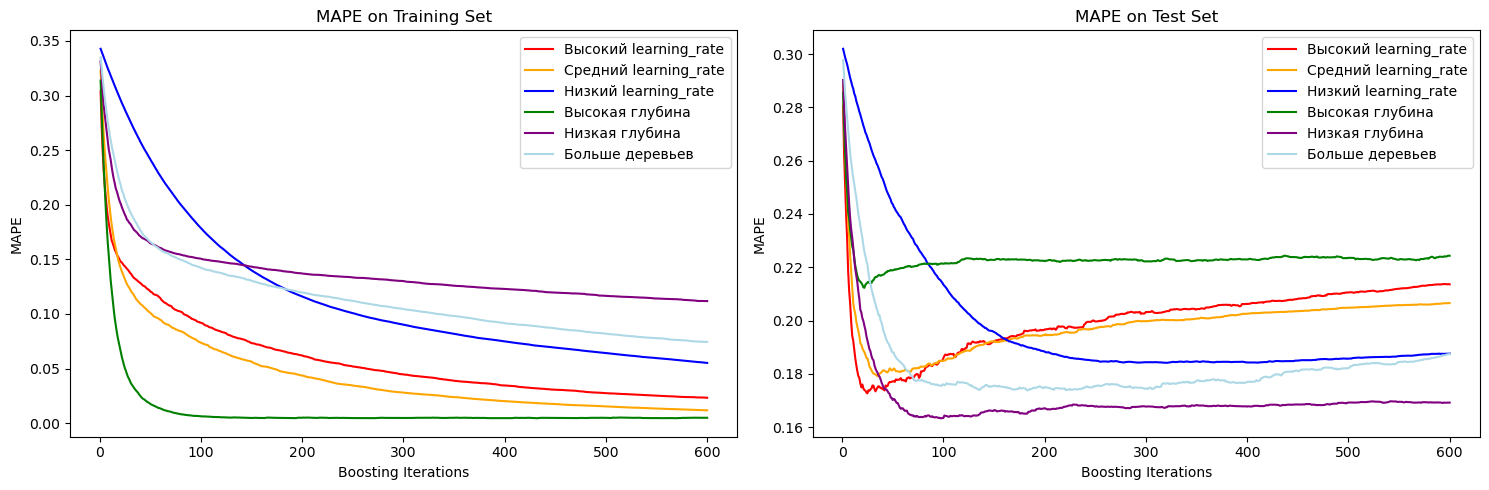

In [109]:
original_params = {
    "n_estimators": 600,
    "random_state": 42,
    'criterion': 'friedman_mse'
}

# Изменение настроек параметров для регрессии
parameter_settings = {
    "high_learning_rate": {
        "label": "Высокий learning_rate",
        "color": "red",
        "params": {"learning_rate": 0.2, "subsample": 1.0, "max_depth": 3,  "max_features": None}
    },
    "moderate_learning_rate": {
        "label": "Средний learning_rate",
        "color": "orange",
        "params": {"learning_rate": 0.1, "subsample": 1.0, "max_depth": 5, "max_features": 'sqrt'}
    },
    "low_learning_rate": {
        "label": "Низкий learning_rate",
        "color": "blue",
        "params": {"learning_rate": 0.01, "subsample": 0.8, "max_depth": 7, "max_features": 'log2'}
    },
    "high_depth": {
        "label": "Высокая глубина",
        "color": "green",
        "params": {"learning_rate": 0.1, "subsample": 0.8, "max_depth": 10, "max_features": None}
    },
    "low_depth": {
        "label": "Низкая глубина",
        "color": "purple",
        "params": {"learning_rate": 0.1, "subsample": 1.0, "max_depth": 2, "max_features": 'sqrt'}
    },
    "more_estimators": {
        "label": "Больше деревьев",
        "color": "lightblue",
        "params": {"learning_rate": 0.05, "subsample": 0.8, "max_depth": 3, "max_features": None}
    }
}


fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

for setting_name, setting_info in parameter_settings.items():
    params = dict(original_params)
    params.update(setting_info['params'])

    reg = GradientBoostingRegressor(**params)
    reg.fit(X_train, y_train)
    
    # Расчет MAPE на обучающем наборе
    train_mape = np.zeros((params["n_estimators"],), dtype=np.float64)
    for i, y_pred in enumerate(reg.staged_predict(X_train)):
        train_mape[i] = mean_absolute_percentage_error(y_train, y_pred)
        
    ax1.plot(
        (np.arange(train_mape.shape[0]) + 1),
        train_mape,
        "-",
        color=setting_info['color'],
        label=setting_info['label'],
    )

    # Расчет MAPE на тестовом наборе
    test_mape = np.zeros((params["n_estimators"],), dtype=np.float64)
    for i, y_pred in enumerate(reg.staged_predict(X_test)):
        test_mape[i] = mean_absolute_percentage_error(y_test, y_pred)
        
    ax2.plot(
        (np.arange(test_mape.shape[0]) + 1),
        test_mape,
        "-",
        color=setting_info['color'],
        label=setting_info['label'],
    )

ax1.set_title("MAPE on Training Set")
ax1.set_xlabel("Boosting Iterations")
ax1.set_ylabel("MAPE")
ax1.legend(loc='upper right')

ax2.set_title("MAPE on Test Set")
ax2.set_xlabel("Boosting Iterations")
ax2.set_ylabel("MAPE")
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()


In [110]:
reg = GradientBoostingRegressor(n_estimators=75, learning_rate= 0.1, subsample=1.0, max_depth=2, max_features='sqrt')
reg.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=2, max_features='sqrt', n_estimators=75)

In [111]:
reg_predict = reg.predict(X_test)
mape = mean_absolute_percentage_error(y_test, reg_predict)
mape

0.16834134547137825

Ниже бредятина, можно не смотреть 

Оптимально : 10


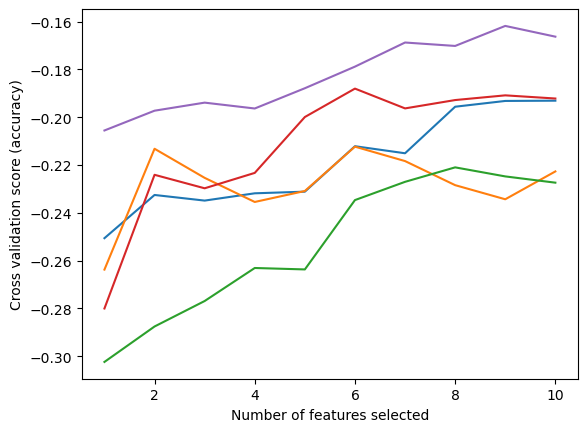

In [75]:
min_features_to_select = 1  # Minimum number of features to consider
rfecv = RFECV(
    estimator=reg,
    step=1,
    cv=KFold(5),
    scoring="neg_mean_absolute_percentage_error",
    min_features_to_select=min_features_to_select,
)
rfecv.fit(X_train, y_train)

print("Оптимально : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
filtered = pd.DataFrame(rfecv.cv_results_).filter(regex='split') #[s for s in rfecv.cv_results_.keys() if 'split' in s]
plt.plot(
    range(min_features_to_select, len(filtered) + min_features_to_select),
    filtered
)
plt.show()

In [90]:
X = path_train.drop(columns = ['price'], axis=1)
y = path_train['price']
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [91]:
kbest = SelectKBest(f_regression, k=10)
kbest.fit(X_train, y_train)
kbest.get_feature_names_out()

array(['2', '12', '18', '19', '20', '21', '22', '24', '25', '27'],
      dtype=object)

In [92]:
X = path_train[['2', '12', '18', '19', '20', '21', '22', '24', '25', '27']]
y = path_train['price']
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [39]:
pipe_lasso = Pipeline([
    ('scaler', StandardScaler()),
    ('model', Lasso(alpha=0.001))
])
pipe_lasso.fit(X_train, y_train)
lasso_predict = pipe_lasso.predict(X_test)
mape = mean_absolute_percentage_error(y_test, lasso_predict)
mape

0.18076726480283056

In [41]:
df = path_train[['2', '12', '18', '19', '20', '21', '22', '24', '25', '27', 'price']]
cor = df.corr()
cor.style.background_gradient(cmap='coolwarm')

,2,12,18,19,20,21,22,24,25,27,price
2,1.000000,0.517711,0.234583,0.150639,0.243506,0.185434,0.226779,0.361520,0.115848,0.212184,0.563425
12,0.517711,1.000000,0.570961,0.329199,0.095319,0.244147,0.503989,0.194787,0.198566,0.120828,0.511799
18,0.234583,0.570961,1.000000,0.245220,0.009227,0.535608,0.528908,0.120707,0.151912,0.008753,0.335347
19,0.150639,0.329199,0.245220,1.000000,0.010757,0.108131,0.316348,0.075381,0.596965,0.215929,0.329963
20,0.243506,0.095319,0.009227,0.010757,1.000000,0.074803,0.055036,0.070686,0.076102,0.147901,0.364022
21,0.185434,0.244147,0.535608,0.108131,0.074803,1.000000,0.334099,0.111141,0.379076,0.123826,0.359166
22,0.226779,0.503989,0.528908,0.316348,0.055036,0.334099,1.000000,0.196074,0.305965,0.164892,0.530927
24,0.361520,0.194787,0.120707,0.075381,0.070686,0.111141,0.196074,1.000000,0.025519,0.136052,0.386473
25,0.115848,0.198566,0.151912,0.596965,0.076102,0.379076,0.305965,0.025519,1.000000,0.277673,0.415463
27,0.212184,0.120828,0.008753,0.215929,0.147901,0.123826,0.164892,0.136052,0.277673,1.000000,0.418608


In [45]:
X = path_train[['2', '12', '18', '19', '20', '21', '22', '24', '25', '27']]
y = path_train['price']
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [46]:
pipe_lasso = Pipeline([
    ('scaler', StandardScaler()),
    ('model', Lasso(alpha=0.001))
])
pipe_lasso.fit(X_train, y_train)
lasso_predict = pipe_lasso.predict(X_test)
mape = mean_absolute_percentage_error(y_test, lasso_predict)
mape

0.1945273850774619

In [54]:
mape_score = make_scorer(mean_absolute_percentage_error, greater_is_better=False)
param_grid = {
    'n_estimators': [500],
    'max_depth': [1,2, 5, 10],
    'min_samples_split': [1, 5, 10],
    'min_samples_leaf': [0,1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}
rf = RandomForestRegressor()

griddd = GridSearchCV(estimator=rf, n_jobs=-1, param_grid=param_grid, scoring=mape_score, cv=3)
griddd.fit(X_train, y_train)


/Users/evgeniakonzafarova/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
216 fits failed out of a total of 432.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
108 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/evgeniakonzafarova/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/evgeniakonzafarova/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/evgeniakonzafarova/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 637, in _validate_par

GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 5, 10],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [0, 1, 2, 4],
                         'min_samples_split': [1, 5, 10],
                         'n_estimators': [500]},
             scoring=make_scorer(mean_absolute_percentage_error, greater_is_better=False))

In [55]:
grid_result_rf = pd.DataFrame(griddd.cv_results_).sort_values(["rank_test_score",'std_test_score']).T
grid_result_rf

,76,88,79,115,113,124,91,127,77,89,...,122,123,126,129,132,133,134,135,138,141
mean_fit_time,1.966143,2.752318,2.370096,2.598357,2.455308,2.722565,2.487422,2.836595,2.228881,2.478386,...,0.00196,0.002745,0.002772,0.007231,0.001871,0.00216,0.002401,0.002023,0.001829,0.00237
std_fit_time,0.02985,0.152019,0.020225,0.012322,0.07659,0.039376,0.032059,0.008396,0.160576,0.032527,...,0.000125,0.000525,0.000699,0.003695,0.00013,0.000551,0.000761,0.000185,0.00004,0.000322
mean_score_time,0.160896,0.173495,0.174583,0.171052,0.209399,0.194929,0.180495,0.17809,0.184166,0.181125,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std_score_time,0.007374,0.00564,0.006417,0.004716,0.005688,0.014076,0.013107,0.003803,0.017667,0.011368,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
param_max_depth,5,5,5,10,10,10,5,10,5,5,...,10,10,10,10,10,10,10,10,10,10
param_max_features,sqrt,log2,sqrt,sqrt,sqrt,log2,log2,log2,sqrt,log2,...,log2,log2,log2,log2,None,None,None,None,None,None
param_min_samples_leaf,1,1,2,2,1,1,2,2,1,1,...,0,1,2,4,0,0,0,1,2,4
param_min_samples_split,5,5,5,5,10,5,5,5,10,10,...,10,1,1,1,1,5,10,1,1,1
param_n_estimators,500,500,500,500,500,500,500,500,500,500,...,500,500,500,500,500,500,500,500,500,500
params,"{'max_depth': 5, 'max_features': 'sqrt', 'min_...","{'max_depth': 5, 'max_features': 'log2', 'min_...","{'max_depth': 5, 'max_features': 'sqrt', 'min_...","{'max_depth': 10, 'max_features': 'sqrt', 'min...","{'max_depth': 10, 'max_features': 'sqrt', 'min...","{'max_depth': 10, 'max_features': 'log2', 'min...","{'max_depth': 5, 'max_features': 'log2', 'min_...","{'max_depth': 10, 'max_features': 'log2', 'min...","{'max_depth': 5, 'max_features': 'sqrt', 'min_...","{'max_depth': 5, 'max_features': 'log2', 'min_...",...,"{'max_depth': 10, 'max_features': 'log2', 'min...","{'max_depth': 10, 'max_features': 'log2', 'min...","{'max_depth': 10, 'max_features': 'log2', 'min...","{'max_depth': 10, 'max_features': 'log2', 'min...","{'max_depth': 10, 'max_features': None, 'min_s...","{'max_depth': 10, 'max_features': None, 'min_s...","{'max_depth': 10, 'max_features': None, 'min_s...","{'max_depth': 10, 'max_features': None, 'min_s...","{'max_depth': 10, 'max_features': None, 'min_s...","{'max_depth': 10, 'max_features': None, 'min_s..."


In [57]:
forest = RandomForestRegressor(n_estimators=500, max_features = 'sqrt',  min_samples_leaf = 1,min_samples_split=5 ,max_depth=5) 
forest.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, max_features='sqrt', min_samples_split=5,
                      n_estimators=500)

In [58]:
forest.fit(X_train, y_train)
forest_predict = forest.predict(X_test)
mape = mean_absolute_percentage_error(y_test, lasso_predict)
mape

0.1945273850774619